# Pricing Test Solution

Problem Statement:

Should the company sell its software for \$39 or \$59?

The VP of Product is interested in having a holistic view into user behavior, especially
focusing on actionable insights that might increase conversion rate. What are your main
findings looking at the data?

[Bonus] The VP of Product feels that the test has been running for too long and he should
have been able to get statistically significant results in a shorter time. Do you agree with
her intuition? After how many days you would have stopped the test? Please, explain
why.

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

user_table=pd.read_csv('../user_table.csv')
test = pd.read_csv('../test_results.csv')


First, lets take a look at the data and spot any abnormalities

In [8]:
test.count()

user_id    275616
city       275616
country    275616
lat        275616
long       275616
dtype: int64

In [3]:
a=test.drop_duplicates('user_id')
a.count()

user_id             316800
timestamp           316800
source              316800
device              316800
operative_system    316800
test                316800
price               316800
converted           316800
dtype: int64

In [9]:
user_table.count()

user_id    275616
city       275616
country    275616
lat        275616
long       275616
dtype: int64

In [12]:
a=user_table.drop_duplicates('user_id')
a.count()

user_id    275616
city       275616
country    275616
lat        275616
long       275616
dtype: int64

Good news! There are no duplicate user_ids in the test and user_table

In [7]:
test['date']=pd.to_datetime(test.timestamp,errors='raise')

ValueError: minute must be in 0..59

There is an issue with the timestamp format on some entries.  

In [27]:
#these users actually are in Russia according to the lattitude and longitude
user_table[(user_table['lat']==27.76) & (user_table['long']==30.31)]

,user_id,city,country,lat,long
1729,383035,Saint Petersburg,USA,27.76,30.31
3025,594095,Saint Petersburg,USA,27.76,30.31
5202,860346,Saint Petersburg,USA,27.76,30.31
9164,794954,Saint Petersburg,USA,27.76,30.31
14125,94635,Saint Petersburg,USA,27.76,30.31
14893,982735,Saint Petersburg,USA,27.76,30.31
25000,113977,Saint Petersburg,USA,27.76,30.31
25889,422311,Saint Petersburg,USA,27.76,30.31
26941,371355,Saint Petersburg,USA,27.76,30.31
29024,66603,Saint Petersburg,USA,27.76,30.31


In [29]:
test[['price','converted']].groupby('price').describe()


converted
price                     
39    count  202672.000000
      mean        0.019889
      std         0.139620
      min         0.000000
      25%         0.000000
      50%         0.000000
      75%         0.000000
      max         1.000000
59    count  114128.000000
      mean        0.015570
      std         0.123806
      min         0.000000
      25%         0.000000
      50%         0.000000
      75%         0.000000
      max         1.000000

In [30]:
a=test[['price','converted']]
a['price_x_converted']=a['price']*a['converted']
a[['price','price_x_converted']].groupby('price').mean()

/home/jeremy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,price_x_converted
price,
39,0.775682
59,0.918644


In [33]:
from scipy.stats import ttest_ind
tmp_a=a[a['price']==39]
tmp_b=a[a['price']==59]
t_stat,p_value=ttest_ind(tmp_a['converted']*39/59,tmp_b['converted'],equal_var=False)
print(p_value)

7.92225772946e-09


I multiply group A by the price ratio to scale it even with group B.  That way I can compare the two conversion rates.
The p value is very small indicating strong evidence that the company should sell the software for $59.

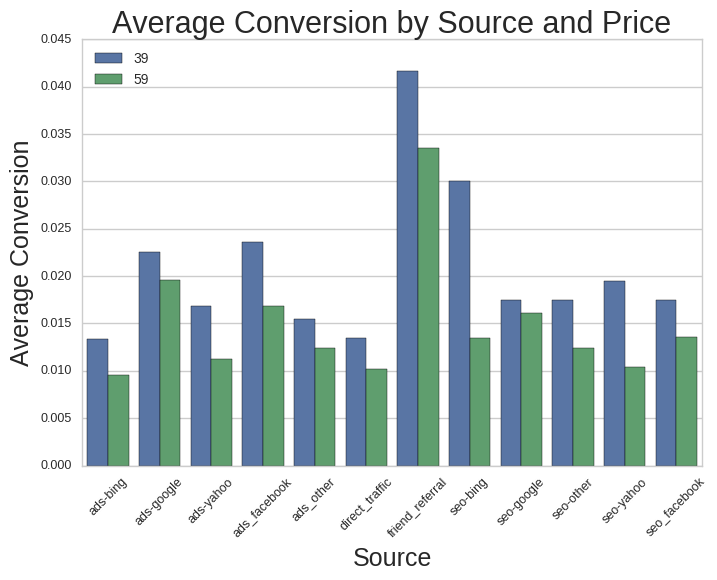

In [54]:

a=test[['source','converted','price']].groupby(['source','price']).mean()
a=a.reset_index()
xlabels=a.source[a['price']==39]
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style('whitegrid',{'figure.figsize':(40,40)})
    graph=sns.barplot(x='source',
                 y='converted', hue='price',
                  data=a,
                 
               ) 
    graph.tick_params(labelsize=9)
    graph.set_xticklabels(xlabels,rotation=45)
    sns.plt.title("Average Conversion by Source and Price",fontsize=22)
    plt.legend(loc='upper left',fontsize=10)
    plt.ylabel("Average Conversion", fontsize=18)
    plt.xlabel("Source", fontsize=18)
    plt.rc('savefig',dpi=100)

This graph provides a lot of insight into what sources to focus on, friend referral is by far the best source for 
conversion.  Direct traffic is quite weak which is probably expected.  There is a large discrepency in conversion for the 39 and 59 pricings for seo-bing and seo-yahoo sources which should be looked into.  Ads-bing is quite a weak source and other sources should probably be considered as a replacement.

/home/jeremy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


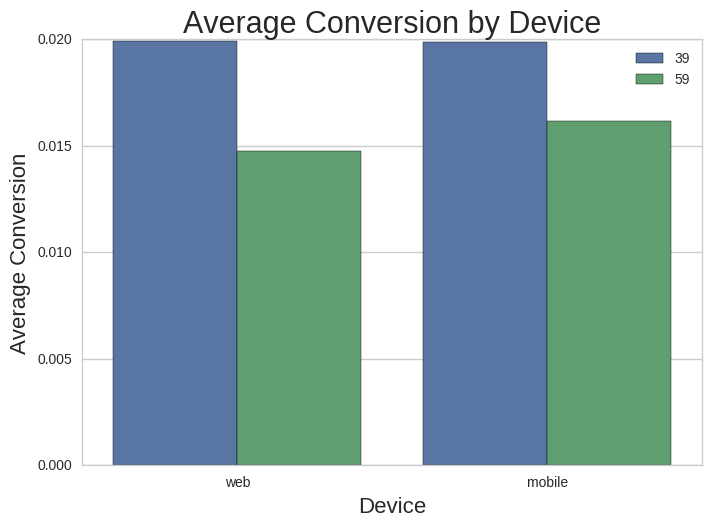

In [217]:

a=test[['device','converted','price']].groupby(['device','price']).mean()
a=a.sort(['converted'],ascending=True)
a=a.reset_index()

with sns.plotting_context("notebook",font_scale=1):
    sns.set_style('whitegrid',rc={'figure.figsize':(25,10)})
    graph=sns.barplot(x='device',
                 y='converted',
                  data=a, hue='price',
                 
               ) 
    graph.tick_params(labelsize=10)
    sns.plt.title("Average Conversion by Device",fontsize=22)
    plt.ylabel("Average Conversion", fontsize=16)
    plt.legend(loc='upper right',fontsize=10)
    plt.xlabel("Device", fontsize=16)
    plt.rc('savefig',dpi=100)

There isn't much to draw from this graph.  Web and mobile conversion are mostly the same which is pretty good as I would expect mobile conversion to be smaller.

/home/jeremy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


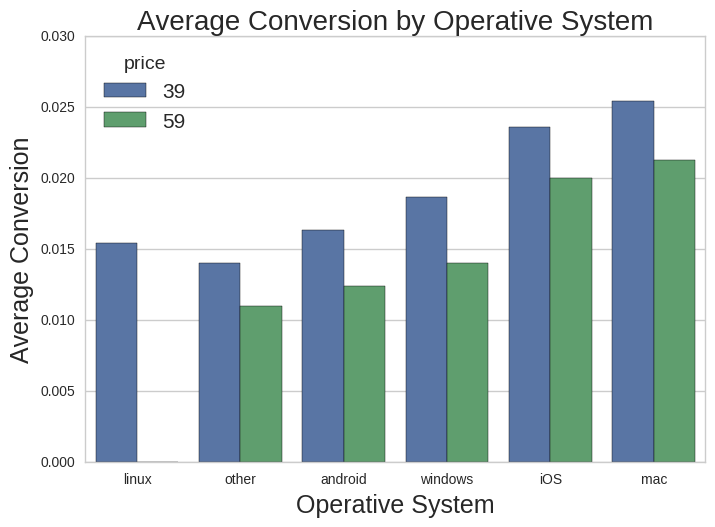

In [221]:

a=test[['operative_system','converted','price']].groupby(['operative_system','price']).mean()
a=a.sort(['converted'],ascending=True)
a=a.reset_index()

with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style('whitegrid',{'figure.figsize':(25,10)})
    graph=sns.barplot(x='operative_system',
                 y='converted', hue='price',
                  data=a,
                           ) 
    graph.tick_params(labelsize=10)
    sns.plt.title("Average Conversion by Operative System",fontsize=20)
    plt.ylabel("Average Conversion", fontsize=18)
    plt.xlabel("Operative System", fontsize=18)
    plt.rc('savefig',dpi=100)

Something happened with linux for price \$59 as the conversion rate was 0.  This definitely needs to be examined before
the company starts selling software for \$59\.  Also, linux conversion rate is low in general.  It seems like the company's software may not be very accomodating for linux users.

In [15]:
test_merged=test.merge(user_table,how='left',on='user_id')
test_merged.count()

user_id             316800
timestamp           316800
source              316800
device              316800
operative_system    316800
test                316800
price               316800
converted           316800
city                275616
country             275616
lat                 275616
long                275616
dtype: int64

Merge was successful, Only some city countries, lattitudes, and longitudes are missing.




I have created some interactive map visualizations in my scripts Us_city_convert_map.py, Us_city_nonconver_map.py, and
Us_city_conver_mean_map.py.  The map files are html files that can be opened in any internet browser: Conversion_Count_map.html, Conversion_Mean_map.html and Missed_Conversion_map.html

It is a great tool for in depth analysis of conversion counts and conversion rates 
throughout the United States.  Something that really sticks out is the largest conversion count is in New York by far.  New York also has a relatively low conversion rate compared to other areas.  This should be a great area to focus on.

The general trend is that conversions are mostly around metropolitan areas.  States like Wyoming, Montana, Idaho, and the Dakohtas have very small conversion counts.

If I had more time I would probably create a new feature that would be something like number of impressions per city divided by conversion rate for that city squared.  The largest value's would indicate the most important cities to focus on.
